In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [28]:
dt = 0.2
header = ["DMagnitude", "X", "Y", "Z"]

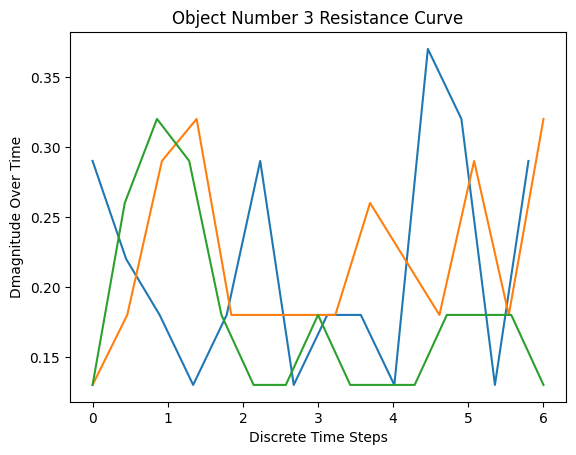

In [ ]:
for i in range (1, 4):
    data = pd.read_csv(f"data/dati_oggetto_{i}.csv", header = 0, names = header)
    time = len(data) * dt 
    dmagnitude = data["DMagnitude"]
    filtered = [x for x in dmagnitude if x != 0]
    time_step = np.linspace(0, time, len(filtered))
    plt.plot(time_step, filtered)
    plt.title(f"Object Number {i} Resistance Curve")
    plt.xlabel("Discrete Time Steps")
    plt.ylabel("Dmagnitude Over Time")
    #plt.savefig(f"curve_di_profilo/curva_oggetto_{i}.png")
    plt.show()